# Optimización

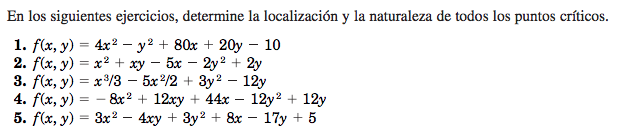

Ejercicio 1

In [7]:
%matplotlib notebook
from sympy import *
init_printing ()

In [8]:
var("x y")

In [9]:
f=4*x**2-y**2+80*x+20*y-10
f

In [10]:
dfx = f.diff(x)
dfy = f.diff(y)
dfx,dfy

In [11]:
pc= solve([dfx,dfy],[x,y])
pc

In [12]:
dfxx = dfx.diff(x)
dfxy = dfx.diff(y)
dfyx = dfy.diff(y)
dfyy = dfy.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc)

Es un punto silla

Ejercicio 2

In [14]:
f = x**2 + x*y - 5*x -2*y**2 + 2*y
f

In [16]:
dfx = f.diff(x)
dfy = f.diff(y)
dfx,dfy

In [17]:
pc=solve([dfx,dfy],[x,y])
pc

In [18]:
dfxx = dfx.diff(x)
dfxy = dfx.diff(y)
dfyx = dfy.diff(y)
dfyy = dfy.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc)

Es un punto silla

Ejercicio 3

In [19]:
f=(x**3/3)-(5*x**2)/2+3*y**2-12*y
f

In [20]:
nablaf=[f.diff(var)for var in [x,y]]
nablaf

In [21]:
pcs=solve(nablaf)
pcs

In [22]:
H=hessian(f,[x,y])
H

⎡2⋅x - 5  0⎤
⎢          ⎥
⎣   0     6⎦

In [23]:
for pc in pcs:
    eig = H.subs(pc).eigenvals()
    print("Punto crítico:",pc,"sus eigenvalores son: ",eig)

Punto crítico: {x: 0, y: 2} sus eigenvalores son:  {6: 1, -5: 1}
Punto crítico: {x: 5, y: 2} sus eigenvalores son:  {6: 1, 5: 1}


El primer punto crítico es un punto silla, y el segundo es un mínimo.

Ejercicio 4

In [24]:
f=-8*x**2 + 12*x*y + 44*x -12*y**2 + 12*y
f

In [25]:
dfx = f.diff(x)
dfy = f.diff(y)
dfx,dfy

In [26]:
pc=solve([dfx,dfy],[x,y])
pc

In [27]:
dfxx = dfx.diff(x)
dfxy = dfx.diff(y)
dfyx = dfy.diff(y)
dfyy = dfy.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc)

Es un máximo

Ejercicio 5

In [28]:
f=3*x**2 - 4*x*y +3*y**2 + 8*x -17*y + 5
f

In [29]:
dfx = f.diff(x)
dfy = f.diff(y)
dfx,dfy

In [30]:
pc=solve([dfx,dfy],[x,y])
pc

In [31]:
dfxx = dfx.diff(x)
dfxy = dfx.diff(y)
dfyx = dfy.diff(y)
dfyy = dfy.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc)

Es un mínimo

6. Una compañía fabrica y venden dos modelos de lámpara L1 y L2. Para su fabricación se necesita un trabajo manual de 20 minutos para el modelo L1 y de 30 minutos para el L2; y un trabajo de máquina para L1 y de 10 minutos para L2. Se dispone para el trabajo manual de 100 horas al mes y para la máquina 80 horas al mes. Sabiendo que el beneficio por unidad es de 15 y 10 euros para L1 y L2, respectivamente, planificar la producción para obtener el máximo beneficio.

In [32]:
!pip install pulp

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [33]:
from pulp import *

In [34]:
prob=LpProblem("Problema fabrica",LpMaximize)
l1=LpVariable("Lámpara 1",0,None,LpInteger)
l2=LpVariable("Lámpara 2",0,None, LpInteger)

In [35]:
prob+= 15*l1+10*l2

In [36]:
prob+= 20*l1+30*l2<= 100*60 ,"Máximo de trabajo manual"
prob+= 20*l1+10*l2<= 80*60 ,"Máximo de trabajo de máquina"

In [37]:
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


In [38]:
for x in prob.variables():
    print(x.name,"=",x.varValue)

Lámpara_1 = 210.0
Lámpara_2 = 60.0


7. Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente. ¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?

In [40]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMaximize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=6.5*x+7*y

#Constraints
mi_lp_problema+=2*x+3*y<=600
mi_lp_problema+=x+y<=500
mi_lp_problema+=2*x+y<=400
mi_lp_problema+=x>=0
mi_lp_problema+=y>=0
mi_lp_problema

Mi LP problema:
MAXIMIZE
6.5*x + 7*y + 0.0
SUBJECT TO
_C1: 2 x + 3 y <= 600

_C2: x + y <= 500

_C3: 2 x + y <= 400

_C4: x >= 0

_C5: y >= 0

VARIABLES
x Continuous
y Continuous

In [41]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [42]:
for variable in mi_lp_problema.variables():
    print("{}={}".format(variable.name, variable.varValue))

x=150.0
y=100.0


8. En una granja de pollos se da una dieta, para engordar, con una composición mínima de 15 unidades de una sustancia A y otras 15 de una sustancia B. En el mercado sólo se encuentra dos clases de compuestos: el tipo X con una composición de una unidad de A y 5 de B, y el otro tipo, Y, con una composición de cinco unidades de A y una de B. El precio del tipo X es de 10 euros y del tipo Y es de 30 €. ¿Qué cantidades se han de comprar de cada tipo para cubrir las necesidades con un coste mínimo?

In [43]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMinimize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=10*x+30*y

#Constraints
mi_lp_problema+=x+5*y>=15
mi_lp_problema+=5*x+y>=15
mi_lp_problema+=x>=0
mi_lp_problema+=y>=0
mi_lp_problema

Mi LP problema:
MINIMIZE
10*x + 30*y + 0
SUBJECT TO
_C1: x + 5 y >= 15

_C2: 5 x + y >= 15

_C3: x >= 0

_C4: y >= 0

VARIABLES
x Continuous
y Continuous

In [44]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [45]:
for variable in mi_lp_problema.variables():
    print("{}={}".format(variable.name, variable.varValue))

x=2.5
y=2.5


9. Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €. ¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

In [47]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMaximize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=2*x+y
#x=pastillas grandes y=pastillas chicas

#Constraints
mi_lp_problema+=40*x+30*y<=600
mi_lp_problema+=x>=3
mi_lp_problema+=y>=2*x
mi_lp_problema+=x>=0
mi_lp_problema+=y>=0
mi_lp_problema

Mi LP problema:
MAXIMIZE
2*x + 1*y + 0
SUBJECT TO
_C1: 40 x + 30 y <= 600

_C2: x >= 3

_C3: - 2 x + y >= 0

_C4: x >= 0

_C5: y >= 0

VARIABLES
x Continuous
y Continuous

In [48]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [49]:
for variable in mi_lp_problema.variables():
    print("{}={}".format(variable.name, variable.varValue))

x=6.0
y=12.0


10. Una escuela prepara una excursión para 400 alumnos. La empresa de transporte tiene 8 autobuses de 40 plazas y 10 de 50 plazas, pero sólo dispone de 9 conductores. El alquiler de un autocar grande cuesta 800 € y el de uno pequeño 600 €. Calcular cuántos autobuses de cada tipo hay que utilizar para que la excursión resulte lo más económica posible para la escuela.

In [53]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMinimize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=600*x+800*y
#x=autobus pequeño y=autobus grande

#Constraints
mi_lp_problema+=40*x+50*y>=400
mi_lp_problema+=x+y<=9
mi_lp_problema+=x>=0
mi_lp_problema+=y>=0
mi_lp_problema

Mi LP problema:
MINIMIZE
600*x + 800*y + 0
SUBJECT TO
_C1: 40 x + 50 y >= 400

_C2: x + y <= 9

_C3: x >= 0

_C4: y >= 0

VARIABLES
x Continuous
y Continuous

In [54]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [55]:
for variable in mi_lp_problema.variables():
    print("{}={}".format(variable.name, variable.varValue))

x=5.0
y=4.0


11. Nota: El peso de una persona se puede adivinar, en parte, por su altura. Los siguientes datos muestran su descriptiva en 30 individuos (ejemplo simulado).


- Genera una grafica de la mejor curva que se ajuste a esos datos.
- ¿Cuál es el peso aproximado de una persona con una altura de 195 cm?

In [82]:
%matplotlib notebook
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [84]:
import numpy as np
np.random.seed(12345)
altura=np.random.normal(171,10,30) #rnorm(30,171,8) #Generar la altura
peso=altura-100+np.random.normal(0,10,30) #Generar el peso

In [85]:
var("x y")

In [86]:
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [88]:
aproximacion=linregress(altura,peso)
linregress(altura,peso)

In [92]:
x=float(input("Ingrese altura"))
y=aproximacion.intercept+aproximacion.slope*x
print("peso: ",y)

Ingrese altura195
peso:  88.84307184051069


<IPython.core.display.Javascript object>


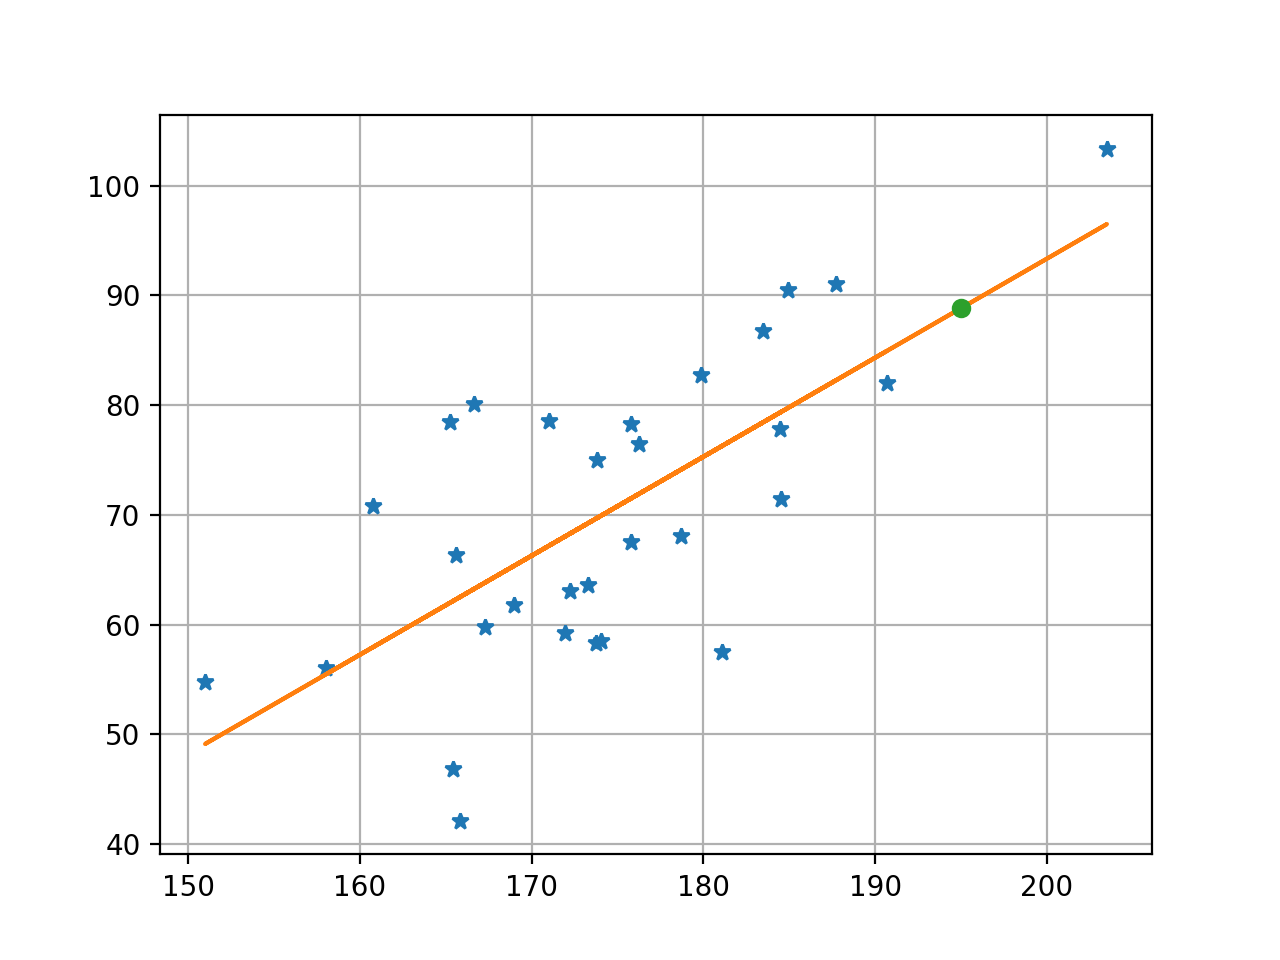

In [96]:
plt.plot(altura,peso,"*")
plt.plot(altura,aproximacion.intercept+aproximacion.slope*altura,"-")
plt.plot(x,y,"o")
plt.grid()
plt.show()

12. El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [139]:
!ls

Examen Ana Isabel Pérez.ipynb  banking.csv


In [142]:
import os
import pandas as pd
banking = pd.read_csv(os.path.join('banking.csv'))
print(banking.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [143]:
banking.head(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0


In [147]:
labels = banking.y.values
features = banking[['age','default','housing','loan','cons_price_idx','cons_conf_idx']]
labels
features.head()

,age,default,housing,loan,cons_price_idx,cons_conf_idx
0,44,unknown,yes,no,93.444,-36.1
1,53,no,no,no,93.200,-42.0
2,28,no,yes,no,94.055,-39.8
3,39,no,no,no,93.075,-47.1
4,55,no,yes,no,92.201,-31.4


In [148]:
pd.get_dummies(features).head()

,age,cons_price_idx,cons_conf_idx,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,44,93.444,-36.1,0,1,0,0,0,1,1,0,0
1,53,93.200,-42.0,1,0,0,1,0,0,1,0,0
2,28,94.055,-39.8,1,0,0,0,0,1,1,0,0
3,39,93.075,-47.1,1,0,0,1,0,0,1,0,0
4,55,92.201,-31.4,1,0,0,0,0,1,1,0,0


In [149]:
features_dummies = pd.get_dummies(features,columns=['loan','default','housing'])
features_dummies.head(16)

,age,cons_price_idx,cons_conf_idx,loan_no,loan_unknown,loan_yes,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes
0,44,93.444,-36.1,1,0,0,0,1,0,0,0,1
1,53,93.200,-42.0,1,0,0,1,0,0,1,0,0
2,28,94.055,-39.8,1,0,0,1,0,0,0,0,1
3,39,93.075,-47.1,1,0,0,1,0,0,1,0,0
4,55,92.201,-31.4,1,0,0,1,0,0,0,0,1
5,30,93.918,-42.7,1,0,0,1,0,0,0,0,1
6,37,92.893,-46.2,1,0,0,1,0,0,0,0,1
7,39,92.893,-46.2,1,0,0,1,0,0,0,0,1
8,36,92.963,-40.8,1,0,0,1,0,0,1,0,0
9,27,93.075,-47.1,1,0,0,1,0,0,0,0,1


In [151]:
data = features_dummies.values
data[0]

array([ 44.   ,  93.444, -36.1  ,   1.   ,   0.   ,   0.   ,   0.   ,
         1.   ,   0.   ,   0.   ,   0.   ,   1.   ])

In [160]:
import numpy as np
np.isnan(data).any()

False

In [170]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [174]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,random_state=0)

imp = Imputer()
imp.fit(train_data)
train_data_finite= imp.transform(train_data)
test_data_finite=imp.transform(test_data)

In [175]:
np.isnan(data).any()

False

In [176]:
np.isnan(train_data_finite).any()

False

In [ ]:
from sklearn.linear_model import LogisticRegression
Ir=LogisticRegression().fit(train_data_finite,train_labels)
print("Logistic Regression score: %f"% Ir.score(test_data_finit))

### Input variables

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [118]:
!open .